<a href="https://colab.research.google.com/github/JJJuniorDev/ML-colab/blob/main/bit_of_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"].astype("int64")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_clf= RandomForestClassifier(random_state=42)
random_forest_clf.fit(X,y)
y_pred=random_forest_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [8]:
from sklearn.decomposition import PCA
pca= PCA(n_components=0.95)
X_ridotto= pca.fit_transform(X_train)
X_test_ridotto = pca.transform(X_test)


In [9]:
random_f= RandomForestClassifier(random_state=42)
random_f.fit(X_ridotto,y_train)
y_pred1 = random_f.predict(X_test_ridotto)
print(accuracy_score(y_test, y_pred1))

KeyboardInterrupt: 

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X,y)
y_pred=sgd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8980714285714285


In [11]:
from sklearn.decomposition import PCA
pca= PCA(n_components=0.95)
X_ridotto= pca.fit_transform(X_train)
X_test_ridotto = pca.transform(X_test)


In [12]:
sgd_clf.fit(X_ridotto, y_train)
y_pred2 = sgd_clf.predict(X_test_ridotto)
print(accuracy_score(y_test, y_pred2))

0.8942142857142857


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_ridotto)

In [19]:
n_samples=3000
X_subset=X_train_scaled[:n_samples]
y_subset=y_train[:n_samples]

In [20]:
from sklearn.manifold import TSNE
tsne= TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=42
)
X_tsne= tsne.fit_transform(X_subset)

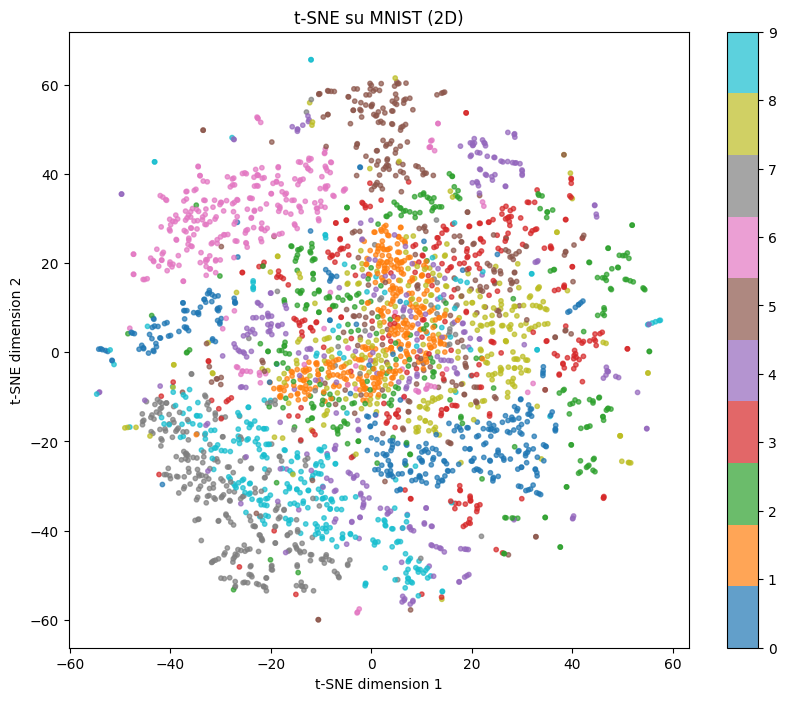

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y_subset,
    cmap="tab10",
    s=10,
    alpha=0.7
)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE su MNIST (2D)")
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.show()